In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns

# Подготовка df

In [82]:
dataset_tk_url ='https://raw.githubusercontent.com/GeorgiyPegov/learning-2023/main/dataset_tk.csv'

In [83]:
df = pd.read_csv((dataset_tk_url), parse_dates=True)

# Анализируем данные в df

In [59]:
df.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [60]:
print ('empty cells total -',df.isna().sum().sum(),'\n',df.isna().sum())

empty cells total - 0 
 Unnamed: 0           0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64


In [61]:
print ('zero values','\n',df.isin([0]).sum())   #проверка на значение 0

zero values 
 Unnamed: 0           0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
dtype: int64


In [62]:
df.min()

Unnamed: 0           01/01/2020 00:00:00
Punjab                              56.1
Haryana                             64.8
Rajasthan                          105.8
Delhi                               41.8
UP                                 186.8
Uttarakhand                         16.8
HP                                  11.8
J&K                                 17.8
Chandigarh                           2.2
Chhattisgarh                        37.2
Gujarat                            192.3
MP                                 131.8
Maharashtra                        305.6
Goa                                  6.2
DNH                                  1.3
Andhra Pradesh                     130.6
Telangana                          130.5
Karnataka                          121.0
Kerala                              55.0
Tamil Nadu                         195.7
Pondy                                4.0
Bihar                               43.5
Jharkhand                           17.4
Odisha          

In [63]:
df.max()

Unnamed: 0           31/12/2019 00:00:00
Punjab                             300.0
Haryana                            237.2
Rajasthan                          278.0
Delhi                              147.1
UP                                 471.8
Uttarakhand                         53.2
HP                                  34.0
J&K                                 54.2
Chandigarh                           7.4
Chhattisgarh                       111.6
Gujarat                            400.8
MP                                 272.3
Maharashtra                        522.1
Goa                                 14.0
DNH                                 19.5
Andhra Pradesh                     205.1
Telangana                          256.2
Karnataka                          273.3
Kerala                              89.4
Tamil Nadu                         365.4
Pondy                                9.7
Bihar                              121.4
Jharkhand                           28.9
Odisha          

Обнаружение выбросов с помощью межквартильного диапазона (IQR)

In [64]:
Q1 = df.quantile(.25)
Q3 = df.quantile(.75)
IQR = Q3 - Q1
higher_outlier = df.quantile(.75) + (IQR * 1.5)
lower_outlier = df.quantile(.25) - (IQR * 1.5)
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
#print(higher_outlier)
#print(lower_outlier)
print(outliers)

Andhra Pradesh        0
Arunachal Pradesh    36
Assam                12
Bihar                 0
Chandigarh            1
Chhattisgarh          1
DNH                  76
Delhi                 0
Goa                  12
Gujarat              17
HP                   51
Haryana               6
J&K                   9
Jharkhand            19
Karnataka             0
Kerala                0
MP                    0
Maharashtra           1
Manipur              20
Meghalaya            26
Mizoram               7
Nagaland             66
Odisha                0
Pondy                23
Punjab               39
Rajasthan            21
Sikkim               65
Tamil Nadu            1
Telangana             0
Tripura               2
UP                    0
Unnamed: 0            0
Uttarakhand          49
West Bengal           0
dtype: int64


<ipython-input-64-882aa14ceddb>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(.25)
<ipython-input-64-882aa14ceddb>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(.75)
<ipython-input-64-882aa14ceddb>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  higher_outlier = df.quantile(.75) + (IQR * 1.5)
<ipython-input-64-882aa14ceddb>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future v

In [65]:
df.describe()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,83.877137,...,80.464612,138.708151,1.289463,2.109145,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487
std,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,10.130427,...,10.905131,27.849180,0.363565,0.231132,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047
min,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,37.200000,...,51.100000,51.500000,0.300000,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000
25%,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,75.700000,...,71.650000,114.650000,1.100000,2.000000,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000
50%,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,82.600000,...,79.800000,131.200000,1.200000,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000
75%,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,91.600000,...,88.400000,164.750000,1.400000,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000
max,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,111.600000,...,113.000000,198.500000,2.800000,2.700000,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000


In [66]:
df.corr().style.background_gradient(cmap='bone_r')

<ipython-input-66-eab5179f3e5a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().style.background_gradient(cmap='bone_r')


,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,Gujarat,MP,Maharashtra,Goa,DNH,Andhra Pradesh,Telangana,Karnataka,Kerala,Tamil Nadu,Pondy,Bihar,Jharkhand,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
Punjab,1.000000,0.955670,0.376721,0.902512,0.804649,0.656262,0.437242,-0.178045,0.895890,0.367010,0.170198,-0.355840,-0.078480,0.190095,0.344060,0.095258,-0.231333,-0.369128,-0.191491,0.333434,0.533898,0.673483,0.235371,0.573743,0.679879,-0.406497,0.369655,0.812801,-0.006402,0.076787,0.072048,0.355168,0.718373
Haryana,0.955670,1.000000,0.517610,0.942060,0.839751,0.764229,0.552601,-0.140497,0.926031,0.406083,0.289899,-0.237214,0.007564,0.297238,0.456517,0.108051,-0.218854,-0.364530,-0.137736,0.368549,0.591080,0.675764,0.313280,0.586222,0.688483,-0.352825,0.443600,0.813689,0.052357,0.177997,0.133657,0.355790,0.718643
Rajasthan,0.376721,0.517610,1.000000,0.442719,0.360466,0.749317,0.738944,0.382112,0.530860,0.225714,0.619435,0.569785,0.415343,0.420450,0.632103,0.317385,0.146618,0.121644,0.145695,0.397359,0.516660,0.168502,0.352728,0.141011,0.192626,0.294421,0.523279,0.284066,0.379163,0.635408,0.290102,0.285236,0.220668
Delhi,0.902512,0.942060,0.442719,1.000000,0.906172,0.733879,0.453851,-0.162798,0.935308,0.466436,0.354093,-0.272191,0.100790,0.308315,0.363749,0.152875,-0.309417,-0.330607,-0.054808,0.404204,0.603659,0.735103,0.348694,0.616726,0.762550,-0.388706,0.351878,0.762662,-0.039760,0.032616,0.085688,0.305181,0.746037
UP,0.804649,0.839751,0.360466,0.906172,1.000000,0.646279,0.313448,-0.128536,0.829112,0.481145,0.330733,-0.231171,0.151446,0.209059,0.215333,0.206397,-0.312869,-0.288655,0.002332,0.395691,0.564110,0.870807,0.427161,0.605426,0.770139,-0.432212,0.243797,0.695984,-0.093863,-0.099374,0.014437,0.245036,0.731443
Uttarakhand,0.656262,0.764229,0.749317,0.733879,0.646279,1.000000,0.856753,0.205605,0.809906,0.416732,0.604240,0.259025,0.360906,0.539926,0.775177,0.300698,0.033539,-0.044596,0.143263,0.544523,0.733378,0.460574,0.393669,0.381020,0.509453,0.027401,0.641206,0.556563,0.271799,0.546227,0.328179,0.342615,0.500948
HP,0.437242,0.552601,0.738944,0.453851,0.313448,0.856753,1.000000,0.248433,0.594515,0.268719,0.516048,0.420625,0.285652,0.583522,0.881924,0.184401,0.211504,-0.028284,0.069829,0.396110,0.592407,0.185279,0.286263,0.227627,0.222442,0.205169,0.708783,0.441739,0.381032,0.745910,0.416265,0.337313,0.282661
J&K,-0.178045,-0.140497,0.382112,-0.162798,-0.128536,0.205605,0.248433,1.000000,-0.025536,-0.089681,0.246408,0.601201,0.309739,-0.033076,0.153985,0.220010,0.339159,0.465077,0.228080,0.117450,0.001995,-0.194191,0.145313,-0.290352,-0.234234,0.545354,0.180535,-0.306105,0.331216,0.356629,0.124370,0.088066,-0.275140
Chandigarh,0.895890,0.926031,0.530860,0.935308,0.829112,0.809906,0.594515,-0.025536,1.000000,0.341649,0.320027,-0.122709,0.090871,0.312971,0.455410,0.120035,-0.185880,-0.290576,-0.099075,0.358767,0.565070,0.677814,0.390460,0.498281,0.643933,-0.186164,0.446665,0.745595,0.101983,0.190078,0.151844,0.376162,0.691194
Chhattisgarh,0.367010,0.406083,0.225714,0.466436,0.481145,0.416732,0.268719,-0.089681,0.341649,1.000000,0.508164,-0.089549,0.417086,0.294460,0.383269,0.428906,0.176830,0.172513,0.293505,0.561241,0.536398,0.437817,0.259278,0.637999,0.648049,-0.313847,0.287613,0.342701,-0.069160,0.052880,0.062938,0.060110,0.409687


# Наблюдение 1

Выбираем для сравнения две пары объектов с высоким показателем корелляции между собой и низким между парами.

In [67]:
dfa = df.copy()
dfa.rename(columns = {'Unnamed: 0':'date', }, inplace = True )
dfa['date'] = pd.to_datetime(dfa['date'], dayfirst=True)
#dfa = dfa.set_index('date')

In [68]:
dfa.info()
dfa.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               503 non-null    datetime64[ns]
 1   Punjab             503 non-null    float64       
 2   Haryana            503 non-null    float64       
 3   Rajasthan          503 non-null    float64       
 4   Delhi              503 non-null    float64       
 5   UP                 503 non-null    float64       
 6   Uttarakhand        503 non-null    float64       
 7   HP                 503 non-null    float64       
 8   J&K                503 non-null    float64       
 9   Chandigarh         503 non-null    float64       
 10  Chhattisgarh       503 non-null    float64       
 11  Gujarat            503 non-null    float64       
 12  MP                 503 non-null    float64       
 13  Maharashtra        503 non-null    float64       
 14  Goa       

Index(['date', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand',
       'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'MP',
       'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana', 'Karnataka',
       'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand', 'Odisha',
       'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype='object')

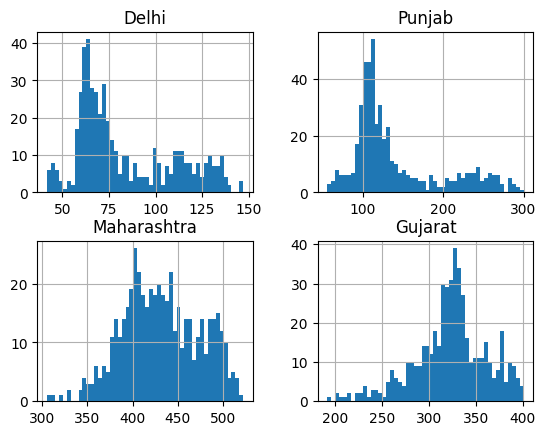

In [81]:
# Визуализация 1
dfa[['Delhi', 'Punjab' , 'Maharashtra', 'Gujarat']].hist(bins=50)
plt.show()

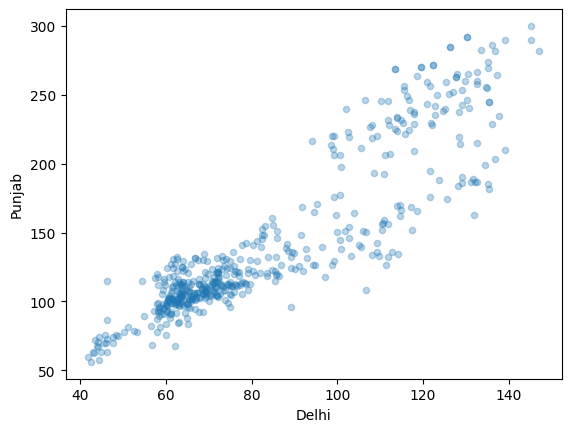

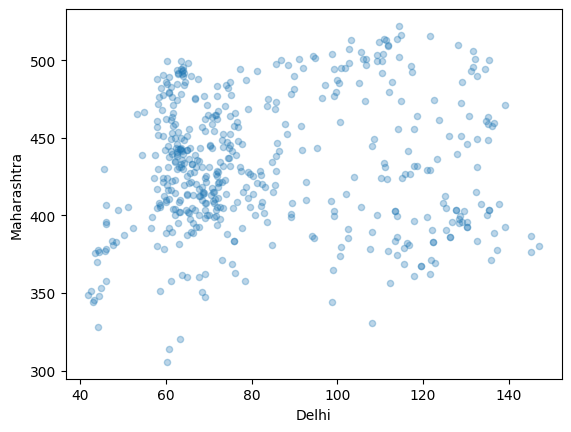

In [80]:
# Визуализация 2
dfa.plot.scatter(x='Delhi', y= 'Punjab', alpha=.3) # визуализация высокой корреляции
dfa.plot.scatter(x='Delhi', y= 'Maharashtra', alpha=.3) # визуализация низкой корреляции
plt.show()

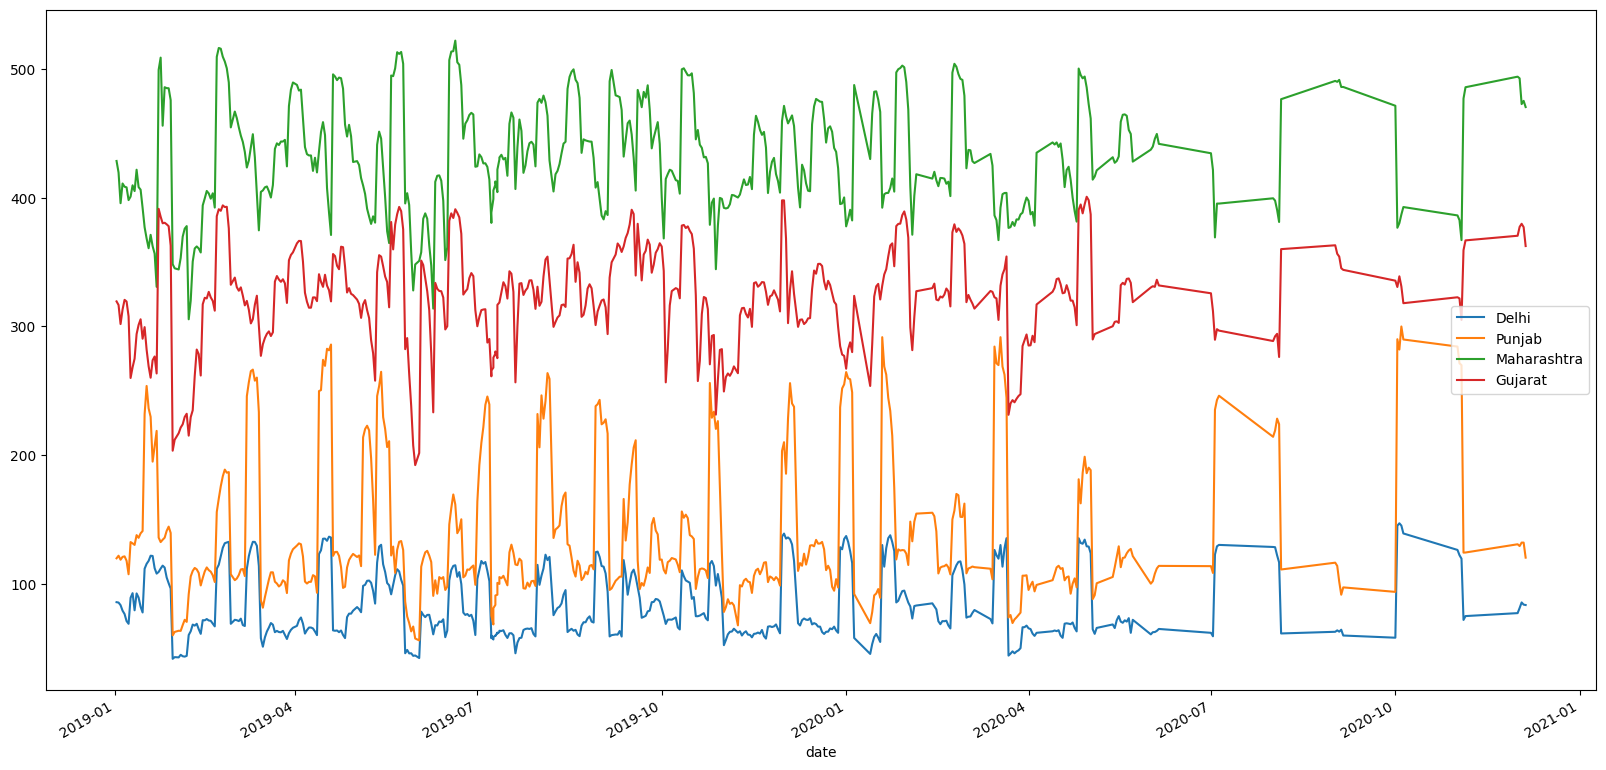

In [79]:
# Визуализация 3
dfa.plot(x='date', y= ['Delhi', 'Punjab', 'Maharashtra', 'Gujarat'], figsize = (20, 10))
plt.show()

# Визуализация выбросов

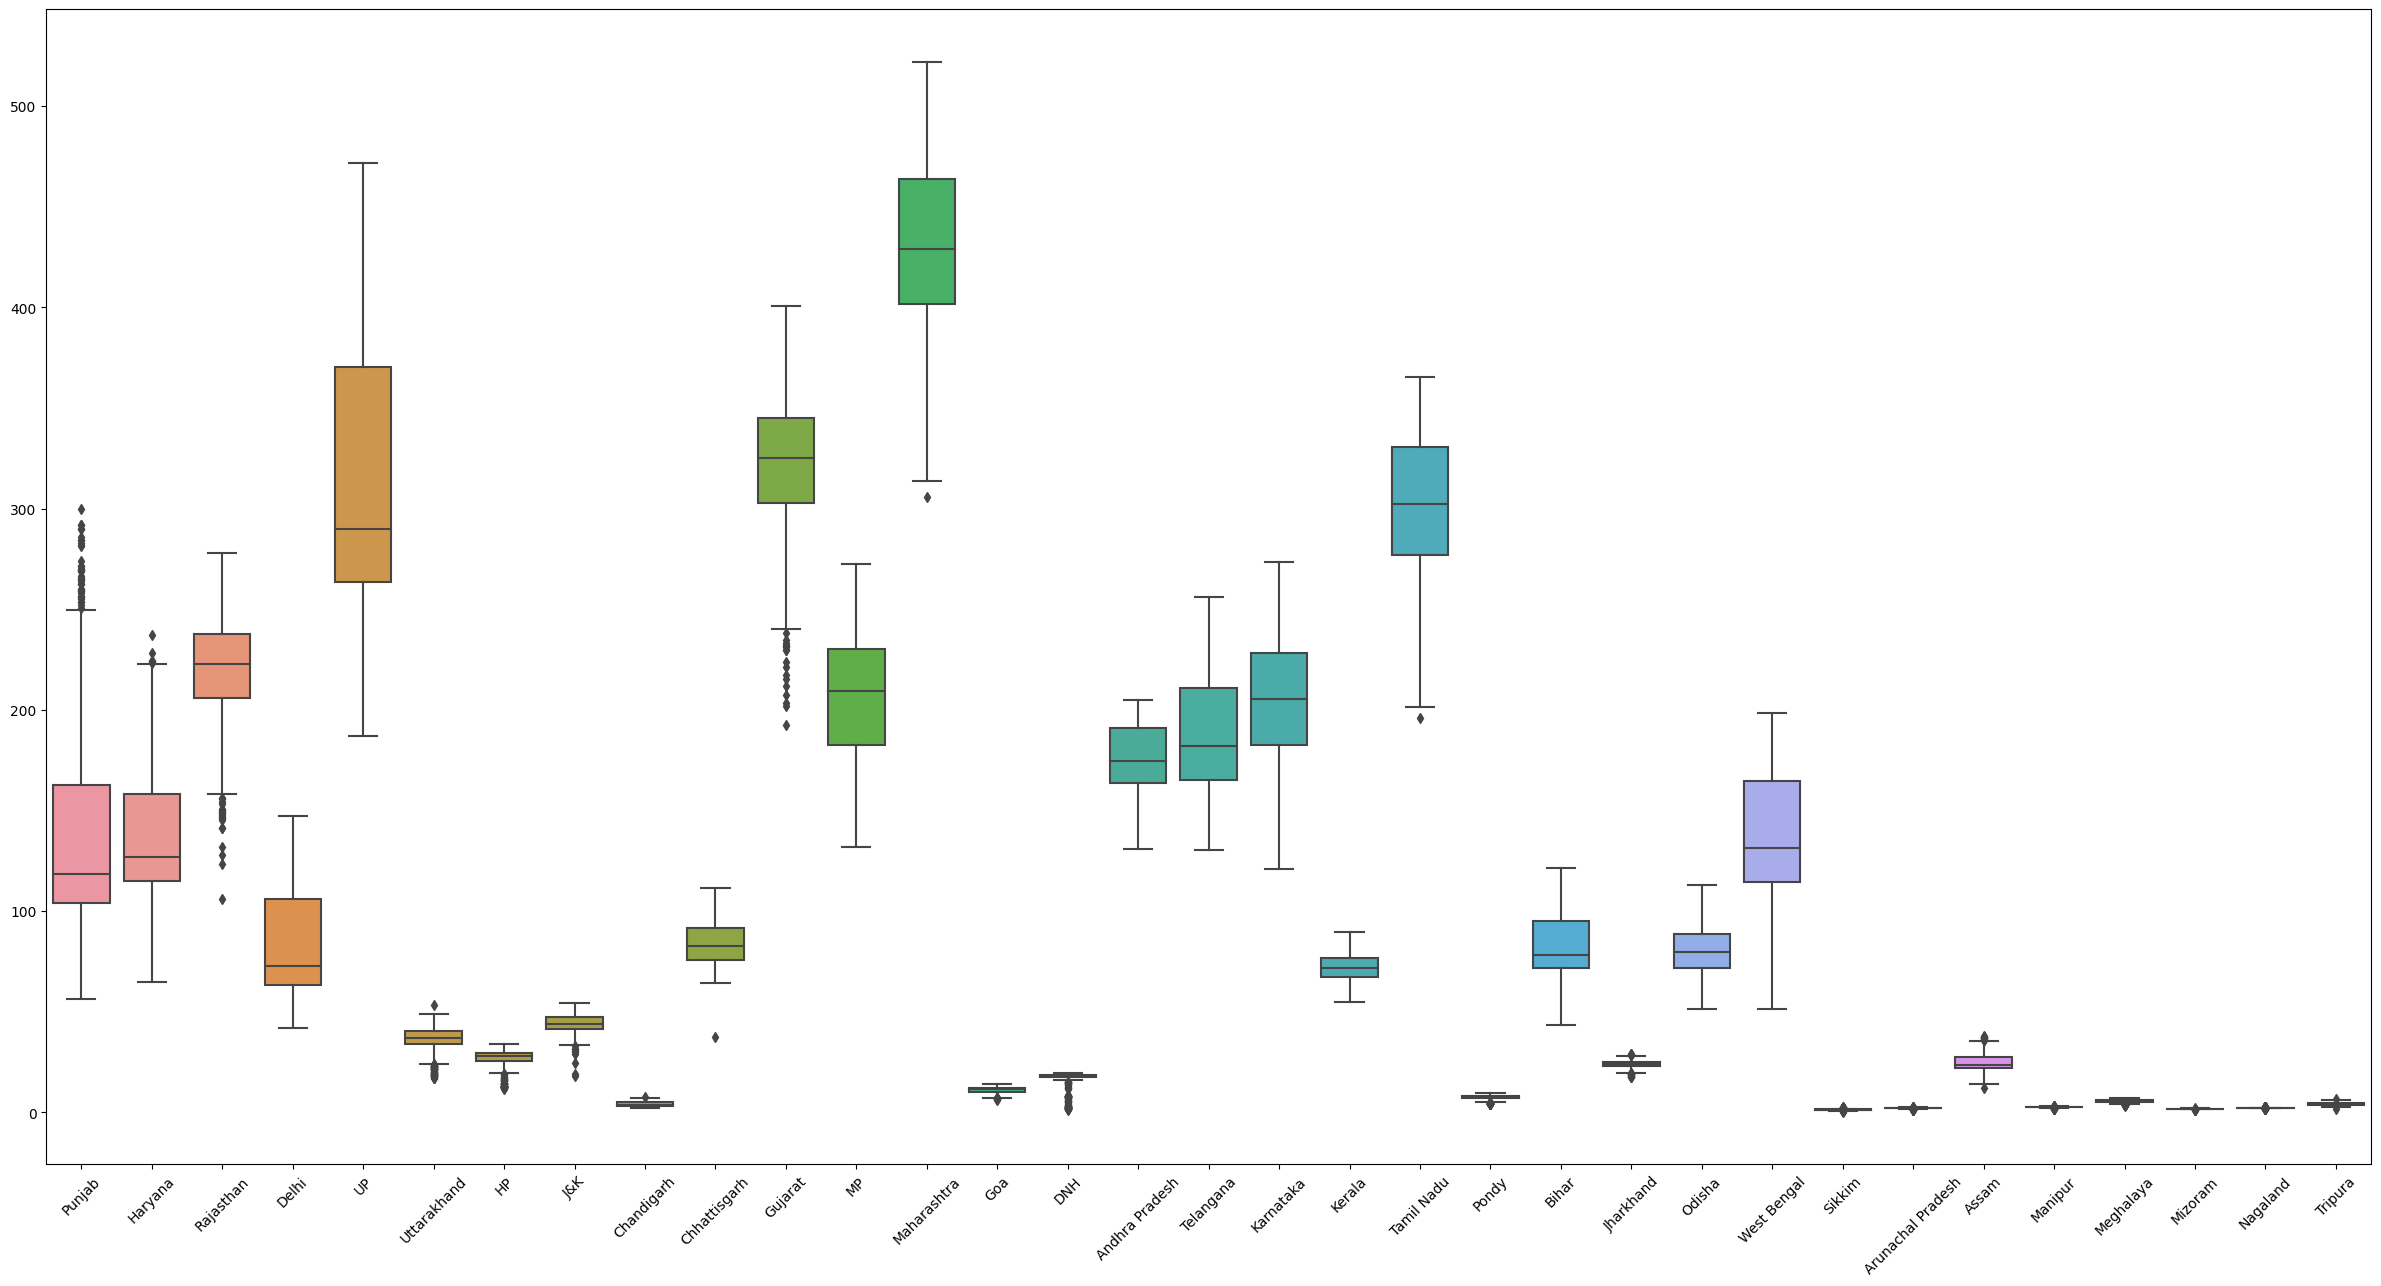

In [72]:
# Визуализация 4
plt.figure(figsize=(30,15))
sns.boxplot(dfa)
plt.xticks(rotation=45)
plt.show()

# Визуализация потребления каждого города в течении всего периода (требование задания)

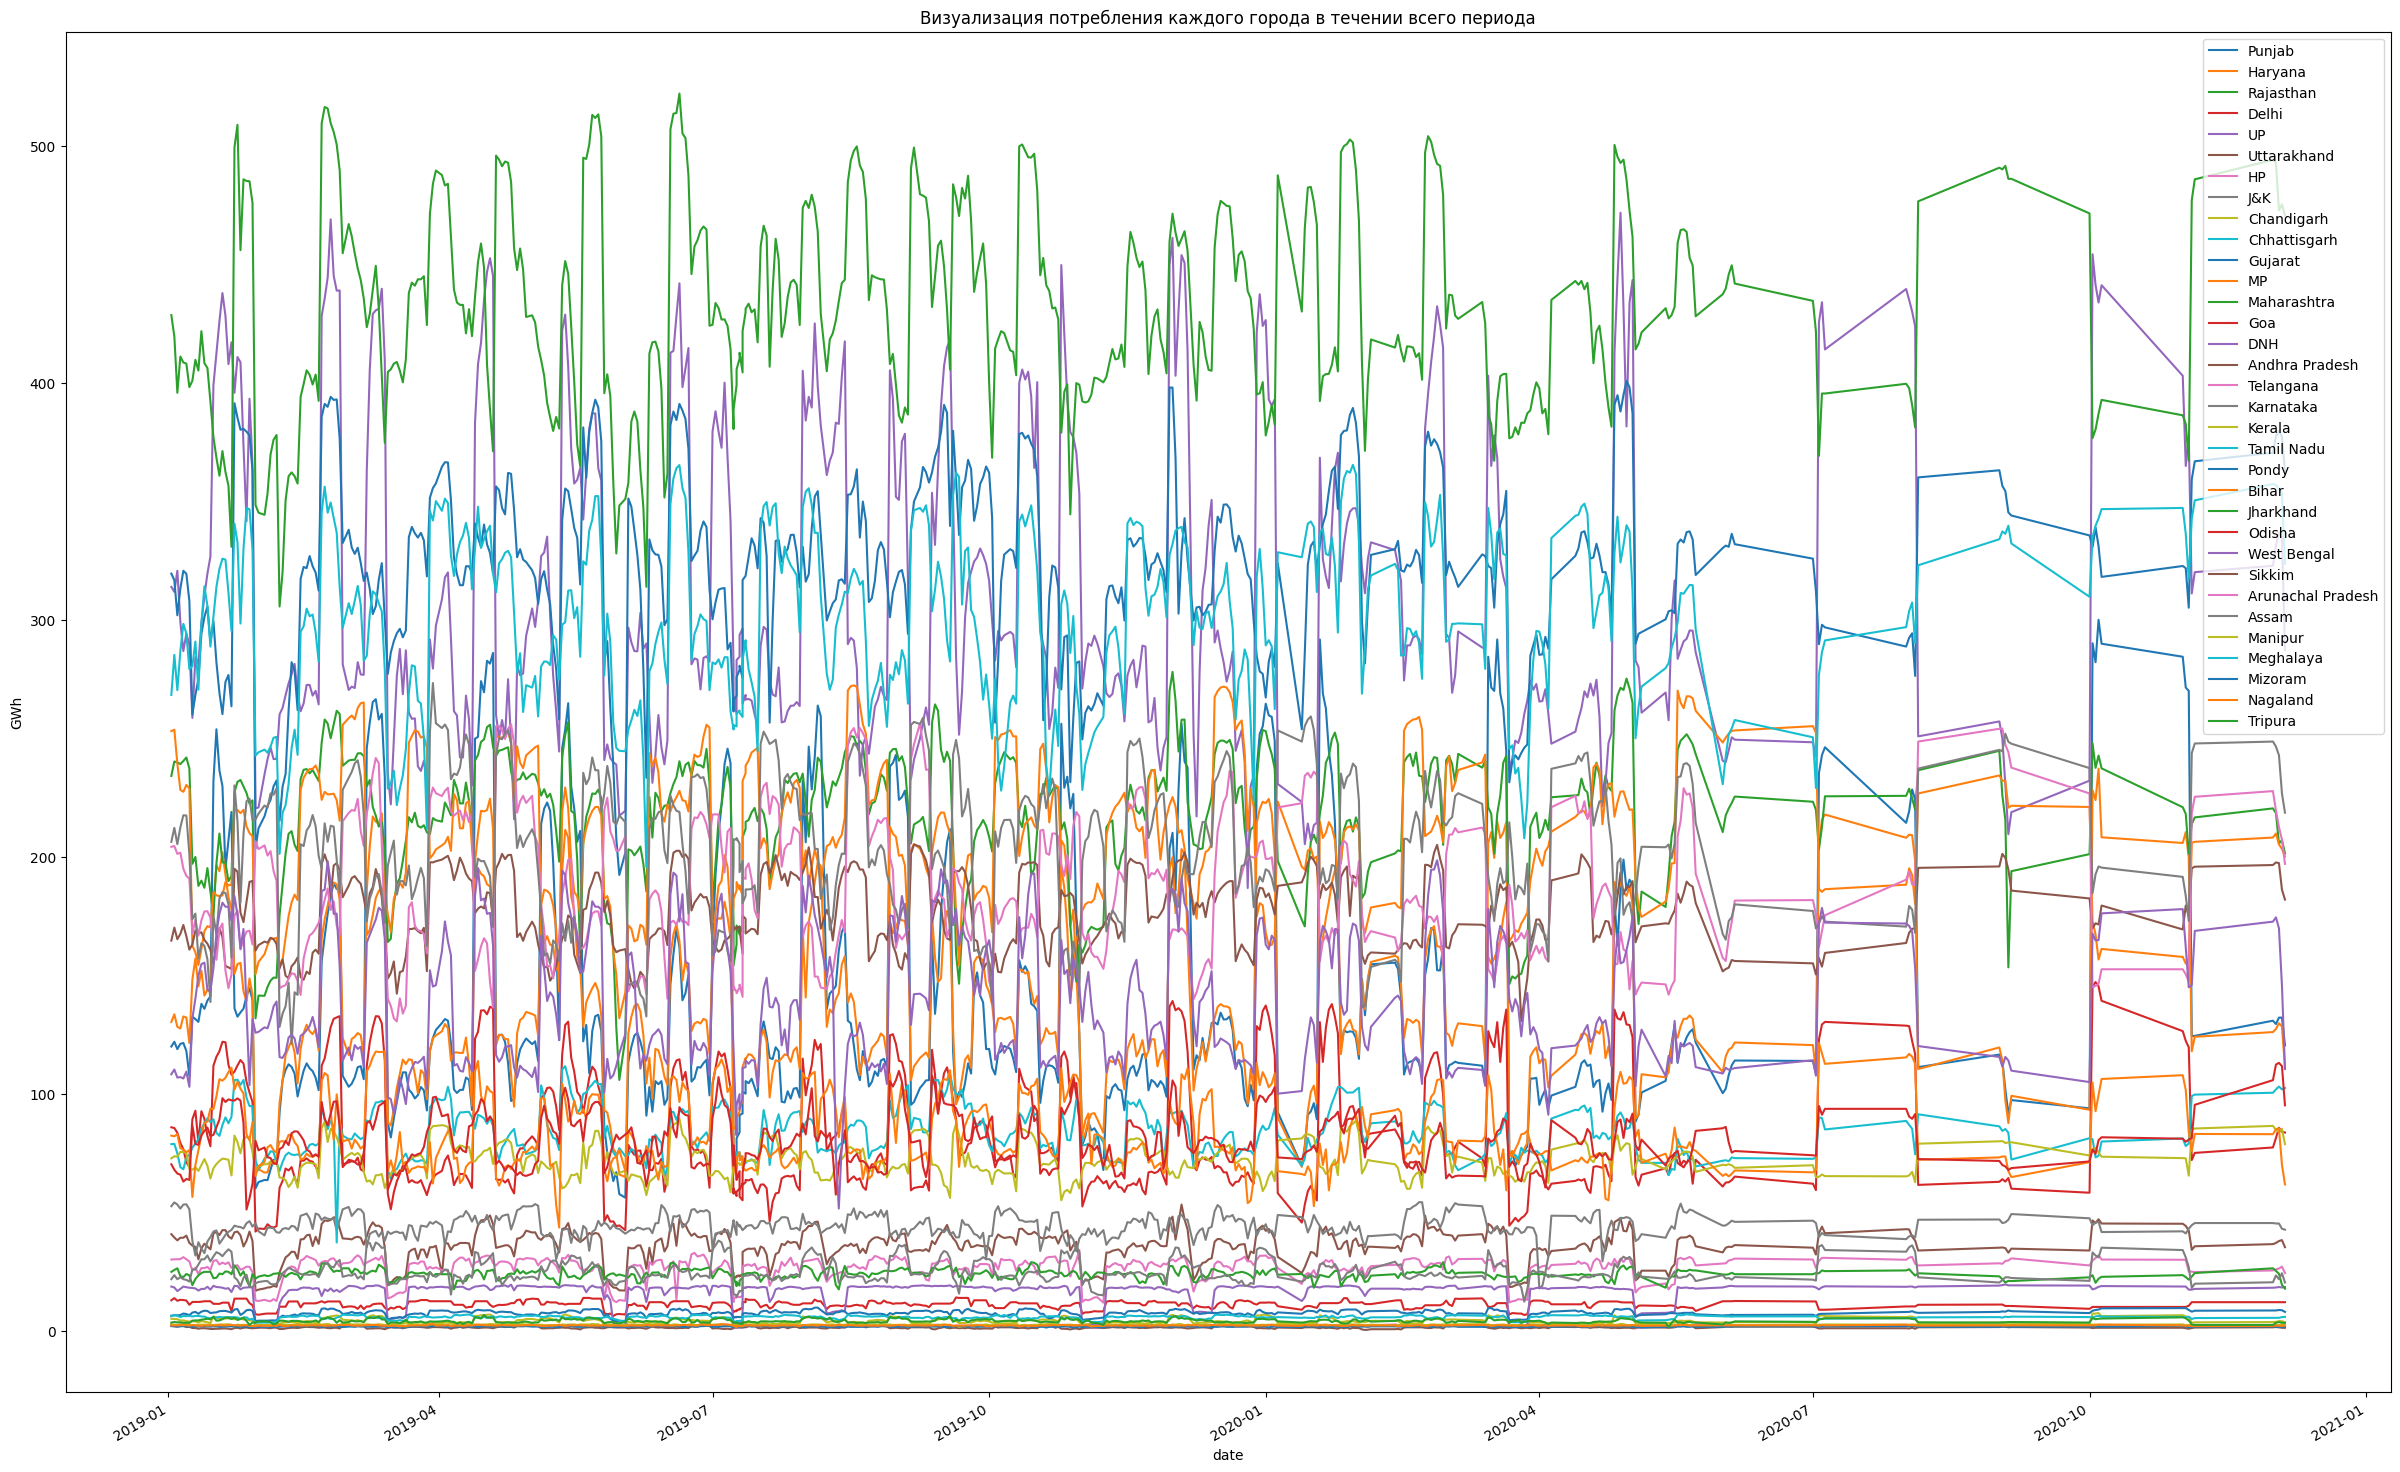

In [78]:
# Визуализация 5
dfa.plot(title = 'Визуализация потребления каждого города в течении всего периода', x = 'date', ylabel='GWh', figsize = (30, 20))
plt.show()

# Наблюдение 2

Визуализация ежемесячного количества замеров

In [74]:
dfb = df.copy()
dfb.rename(columns = {'Unnamed: 0':'date', }, inplace = True )
dfb['date']=pd.to_datetime(dfb['date'], dayfirst=True)
dfb['year'] = dfb['date'].dt.year
dfb['month'] = dfb['date'].dt.month
dfb['day'] = dfb['date'].dt.day
dfb.drop('date', axis = 1, inplace=True)

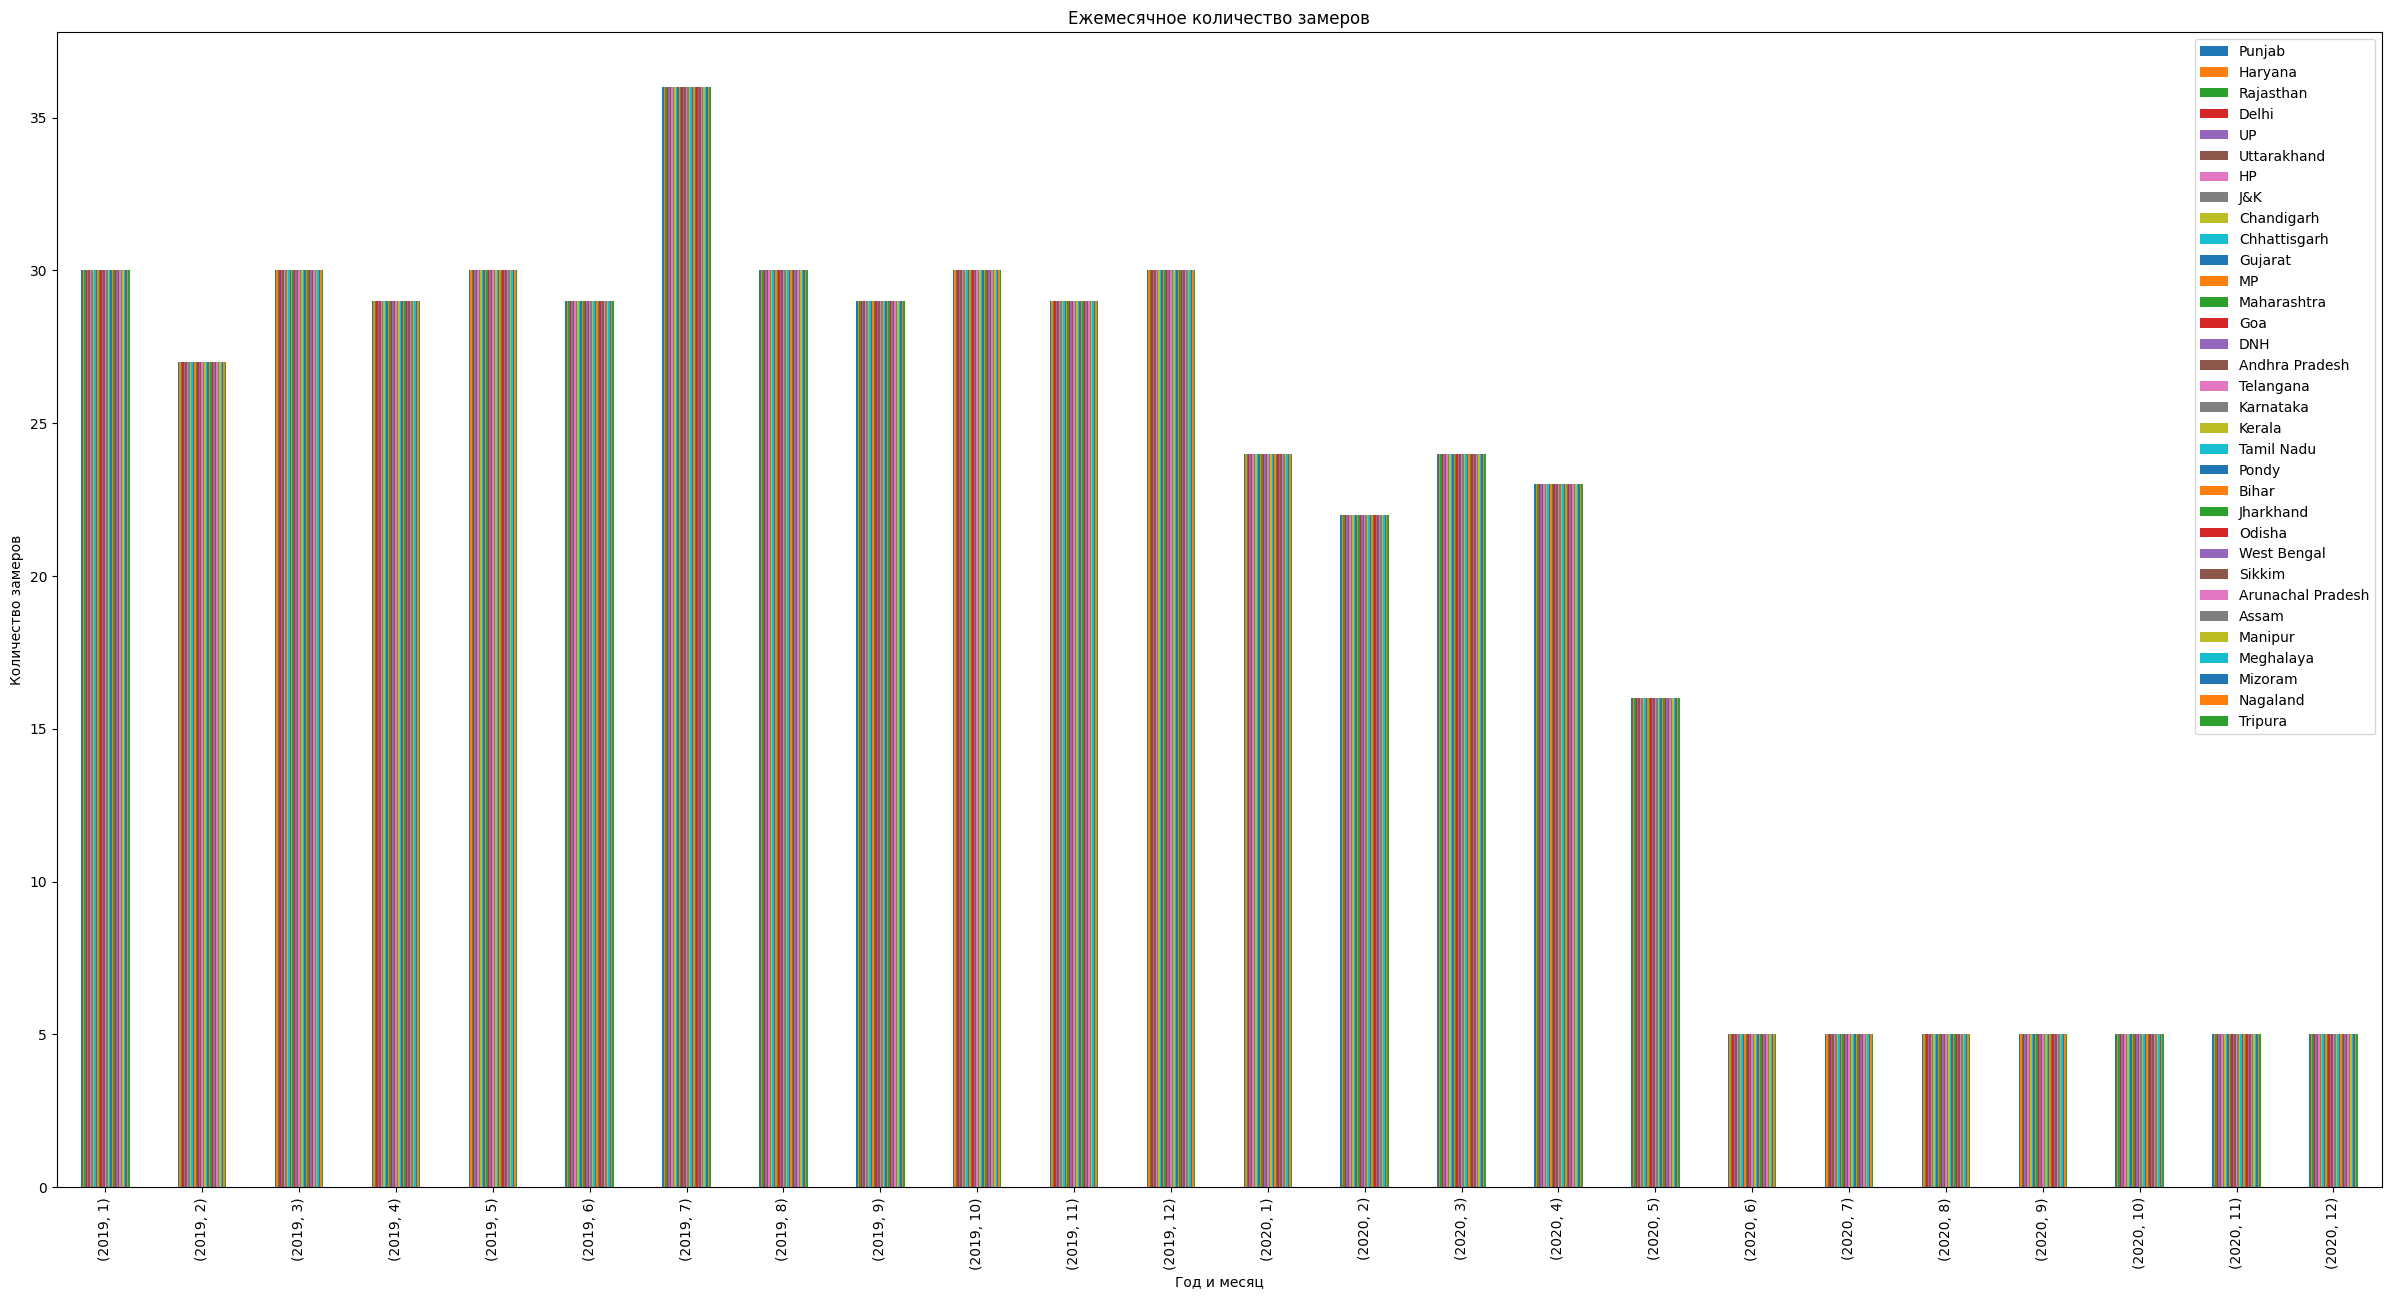

In [86]:
# Визуализация 6
dfb2 = dfb.drop('day', axis=1).groupby(['year','month']).count()
dfb2.plot(title='Ежемесячное количество замеров', ylabel='Количество замеров', xlabel='Год и месяц', kind = 'bar', figsize = (30, 15))
plt.show()

# Наблюдение 3

Визуализация среднего потребления по штатам за 2019 и 2020 год

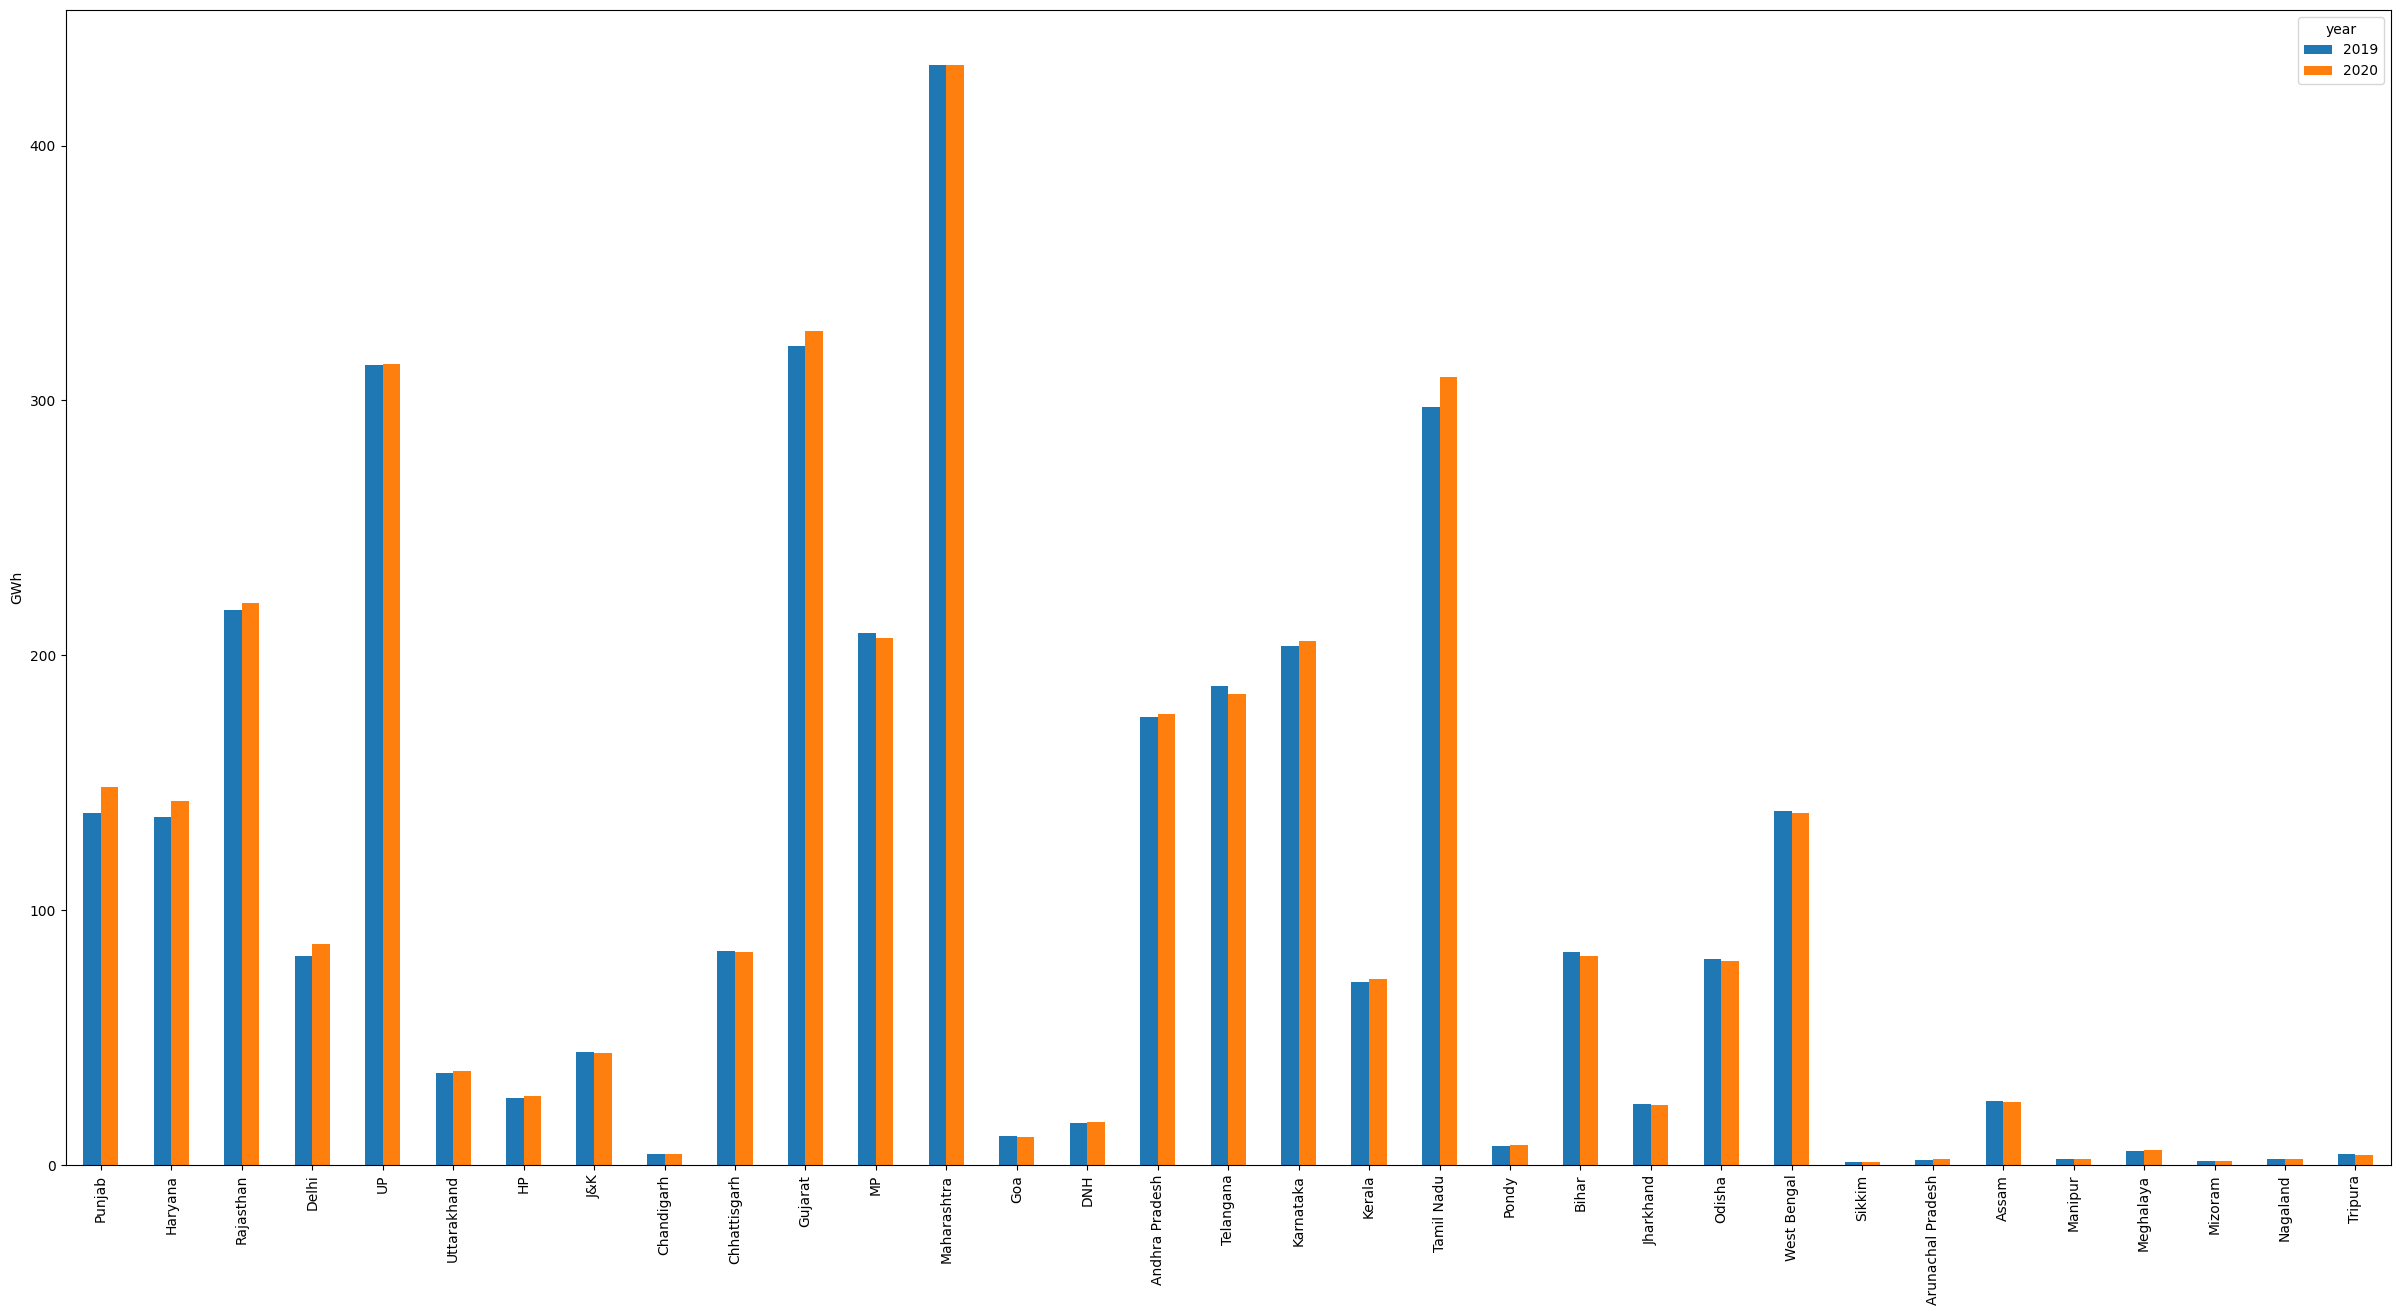

In [114]:
# Визуализация 7
dfb3 = dfb.drop(['day', 'month'], axis=1).groupby('year').mean()
dfb3 = dfb3.transpose()
dfb3.plot(kind = 'bar', ylabel='GWh', figsize = (30, 15))
plt.show()

In [119]:
dfb4 = dfb3.sum()
dfb4

year
2019    3387.758496
2020    3427.240278
dtype: float64

# Описание наблюдений

Предоставленный датасет предварительно проанализирован на целостность данных, отсутствие пустых значений, нулевых значений, произведен анализ выбросов. Составлена описательная статистика, визуализация корелляции объектов датасета.

**Наблюдение 1**

Для наблюдения было выбрано 4 штата, разделенные на пары по условиям: пара - штаты с высокой корелляцией, между собой штаты пары должны иметь низкий показатель корелляции по отношению к штатам противоположной пары //визуализация 1, 2//
При сравнении потребления электроэнергии штатов за период 2019-2020г. //визуализация 3//, было выявлено:

a. Пики потребления противоположных пар смещены по временной шкале в пределах месяца.

b. Наблюдается общий спад потребления, приходящийся на первый этап ограничений //25 марта - 14 апреля//, связанного с пандемией COVID-19 в Индии.

с. С июня 2020 года количесто данных на единицу времени уменьшается //визуализация 3//.

d. В количестве потребления прослеживается сезонность, наблюдаемые пики потребления 2019 идентичны 2020г. //однако период ограничений и уменьшение количества данных внесли свои изменения//

**Наблюдение 2**

a. Количество замеров за каждый месяц всего периода одинаково для всех штатов.

b. В 2019 году замеры в среднем проводились ежедневно, с начала 2020 количество замеров начало снижаться и с июня 2020 до конца года стало равным пяти в месяц.
//dизуализация 6//

**Наблюдение 3**

a. Несмотря на ограничения, связанные с пандемией COVID-19, в 2020 году тенденция к общему увеличению потребления электроэнергии сохранилась.//визуализация 7//
